In [1]:
import numpy as np
import perceval as pcvl
from perceval.components import PS, BS, PERM, Port
from perceval.utils import Encoding
from perceval.rendering.circuit import SymbSkin, PhysSkin

In [2]:
from perceval.components import catalog
print(catalog.list())

['klm cnot', 'heralded cnot', 'postprocessed cnot', 'heralded cz', 'generic 2 mode circuit', 'mzi phase first', 'mzi phase last', 'postprocessed ccz', 'toffoli']


In [3]:
heralded_cnot = catalog['heralded cnot'].build_processor()
postprocessed_cnot = catalog['postprocessed cnot'].build_processor()

In [4]:
pi = np.pi

t = (pcvl.Circuit(2, name="T")
       .add(1, PS(pi/4))
       )

tdg = (pcvl.Circuit(2, name="Tdg")
       .add(1, PS(7*pi/4))
       )

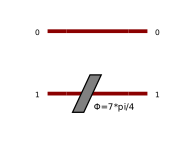

In [5]:
pcvl.pdisplay(tdg, skin=PhysSkin())

In [42]:
CCZ_processor = pcvl.Processor("SLOS", 6)
CCZ_processor = (CCZ_processor
                 .add_port(0, Port(Encoding.DUAL_RAIL, 'ctrl'))
                 .add_port(2, Port(Encoding.DUAL_RAIL, 'ctrl'))
                 .add_port(4, Port(Encoding.DUAL_RAIL, 'data'))
                 .add(2, catalog['heralded cnot'].build_processor())
                 .add(4, tdg)
                 .add((0,1,4,5), catalog['heralded cnot'].build_processor())
                 .add(4, t)
                 .add((2,3,4,5), catalog['heralded cnot'].build_processor())
                 .add(4, tdg)
                 .add((0,1,4,5), catalog['heralded cnot'].build_processor())
                 .add(2, t)
                 .add(4, t)
                 .add(0, catalog['heralded cnot'].build_processor())
                 .add(0, t)
                 .add(2, tdg)
                 .add(0, catalog['postprocessed cnot'].build_processor())
                 )

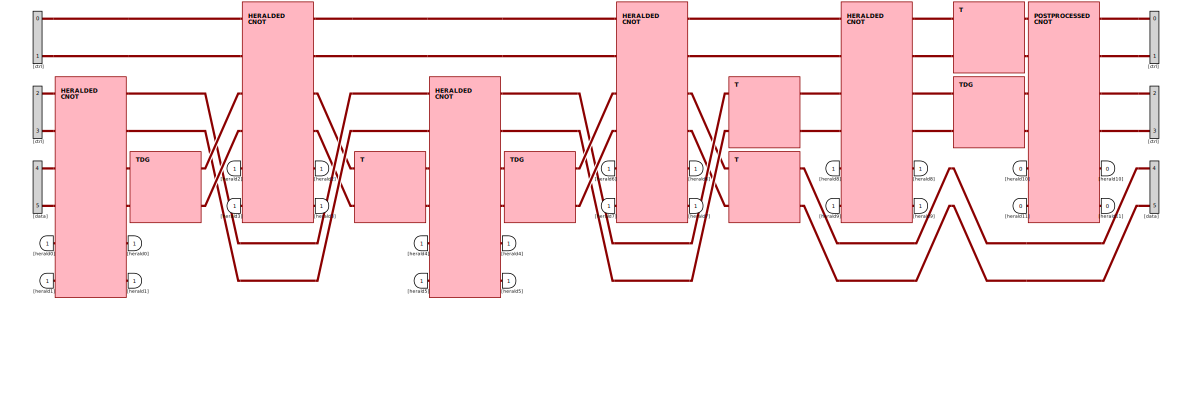

In [43]:
pcvl.pdisplay(CCZ_processor, skin=PhysSkin(),  render_size=0.6)

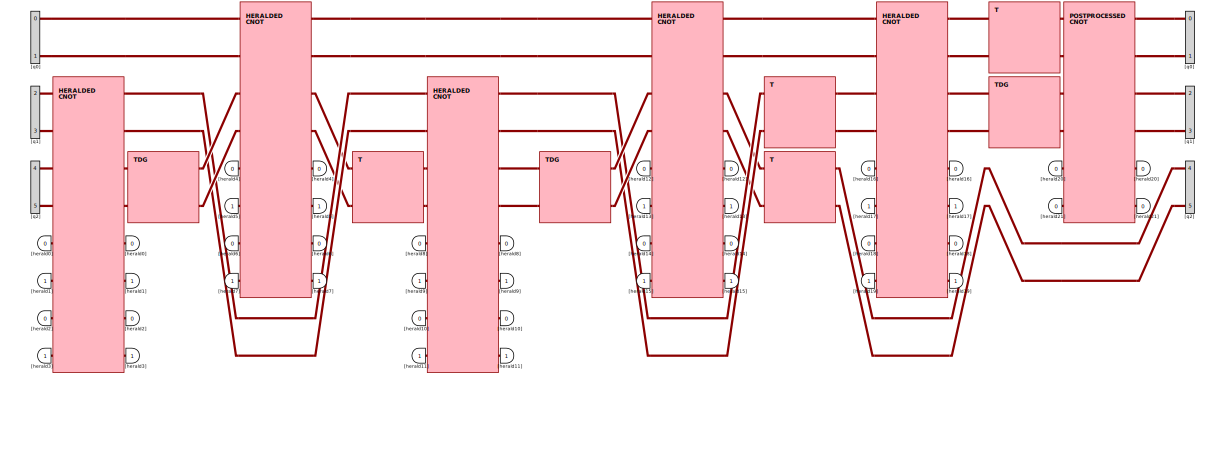

In [ ]:
qiskit_converter = QiskitConverter(catalog, backend_name="Naive")
quantum_processor = qiskit_converter.convert(qc, use_postselection=True)
pcvl.pdisplay(quantum_processor,  render_size=0.6)

## Converting Qiskit Circuit into Perceval

In [3]:
import perceval as pcvl
from perceval.components import catalog
from perceval.converters import QiskitConverter, MyQLMConverter
from perceval.algorithm import Analyzer, Sampler

from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

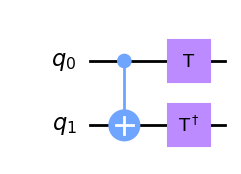

In [ ]:
qc2 = QuantumCircuit(2)

qc2.cnot(0,1)
qc2.t(0)
qc2.tdg(1)

qc2.draw('mpl')

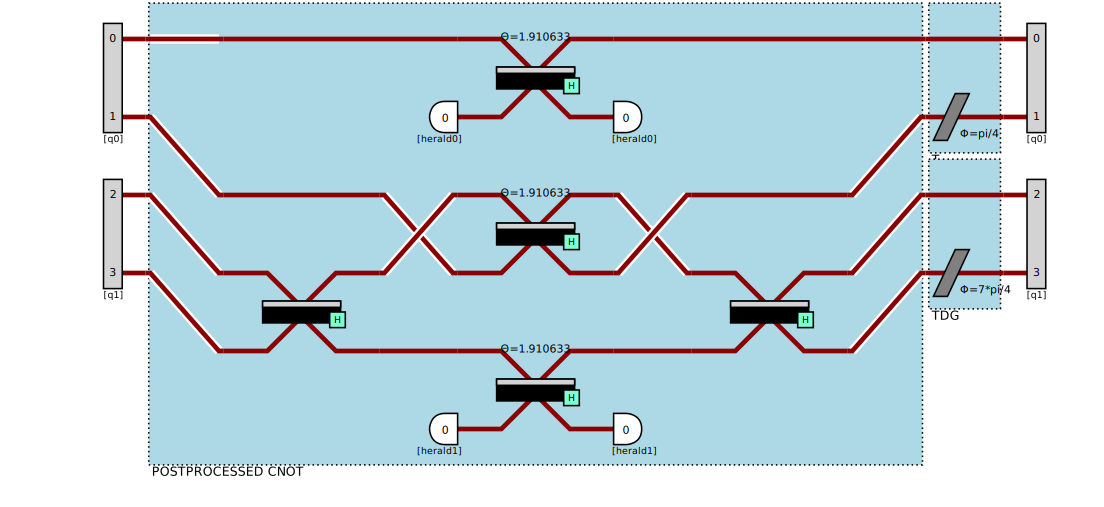

In [ ]:
qiskit_converter = QiskitConverter(catalog, backend_name="Naive")
qp2 = qiskit_converter.convert(qc2, use_postselection=True)
pcvl.pdisplay(qp2, recursive = True, render_size=1.25)

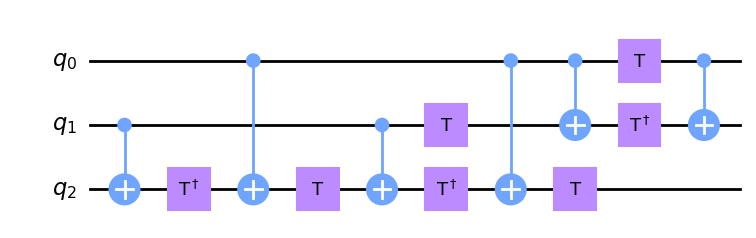

In [5]:
qc = QuantumCircuit(3)

qc.cnot(1,2)
qc.tdg(2)
qc.cnot(0,2)
qc.t(2)
qc.cnot(1,2)
qc.tdg(2)
qc.cnot(0,2)
qc.t([1,2])
qc.cnot(0,1)
qc.t(0)
qc.tdg(1)
qc.cnot(0,1)

qc.draw('mpl')

### CCZ gate (with given decomposition) in Perceval

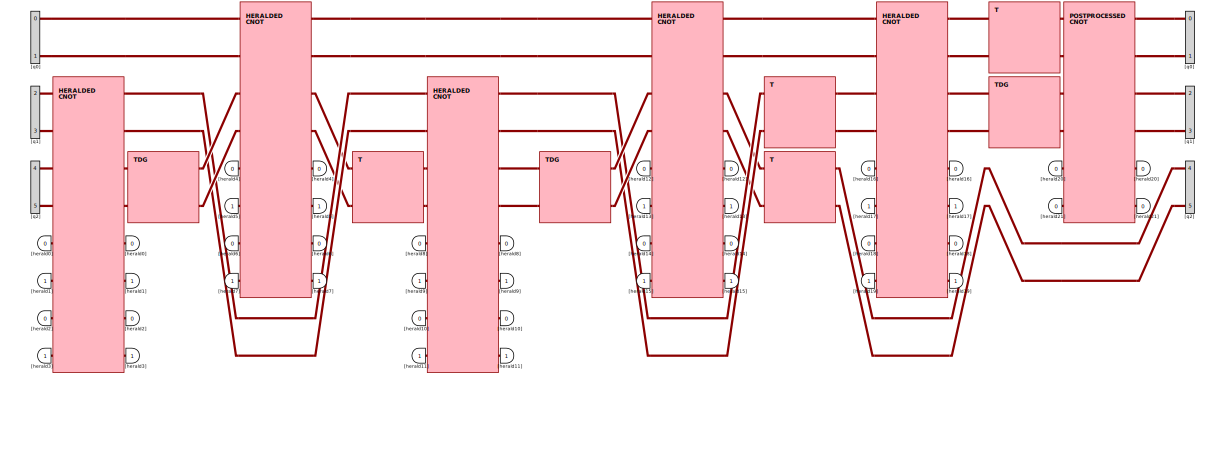

In [16]:
qiskit_converter = QiskitConverter(catalog, backend_name="Naive")
quantum_processor = qiskit_converter.convert(qc, use_postselection=True)
pcvl.pdisplay(quantum_processor,  render_size=0.6)